In [1]:
# !pip install numpy
import numpy as np

DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.


In [2]:
def policy(matrix, weight):
    """Computes the policy with weight of a matrix"""
    z = matrix.dot(weight)
    exp = np.exp(z)
    return exp / np.sum(exp, axis=1, keepdims=True)

In [3]:
# Test the function
weight = np.ndarray((4, 2), buffer=np.array([
    [4.17022005e-01, 7.20324493e-01], 
    [1.14374817e-04, 3.02332573e-01], 
    [1.46755891e-01, 9.23385948e-02], 
    [1.86260211e-01, 3.45560727e-01]
]))
state = np.ndarray((1, 4), buffer=np.array([
    [-0.04428214,  0.01636746,  0.01196594, -0.03095031]
]))

res = policy(state, weight)
print(res)

[[0.50351642 0.49648358]]


By using the previous function created *policy*, write a function that computes the Monte-Carlo policy gradient based on a state and a weight matrix.

In [4]:
def policy_gradient(state, weight):
    """
    Compute the Monte Carlo policy gradient
    based on state/weight.
    """
    probs = policy(state, weight)
    action =  np.random.choice(2, p=probs[0])
    dlog = np.zeros_like(probs)
    dlog[0, action] = 1
    grad = dlog - probs
    return action, grad

In [6]:
import gym

In [7]:
# Test the function
env = gym.make('CartPole-v1')
np.random.seed(1)

weight = np.random.rand(4, 2)
state = env.reset()[None, :]
print("Weight", weight)
print("State", state)

action, grad = policy_gradient(state, weight)
print("Action", action)
print("Gradient", grad)

env.close()

Weight [[4.17022005e-01 7.20324493e-01]
 [1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02]
 [1.86260211e-01 3.45560727e-01]]
State [[ 0.0408284  -0.0351183  -0.00763541 -0.00344783]]
Action 0
Gradient [[ 0.50040906 -0.50040906]]


In [9]:
def train(env, nb_episodes, alpha=0.000045, gamma=0.98):
    """Implements a full training"""
    np.random.seed(1)
    weight = np.random.rand(4, 2)
    scores = []

    for episode in range(1, nb_episodes + 1):
        state = env.reset()[None, :]
        grads = []
        rewards = []
        score = 0
    
        while True:
            action, grad = policy_gradient(state, weight)
            state, reward, done, _ = env.step(action)
            state = state[None, :]

            grads.append(grad)
            rewards.append(reward)
            score += reward

            if done:
                break

        for i in range(len(grads)):
            for j in range(i, len(grads)):
                grads[i] += gamma ** (j - i) * rewards[j]

        for grad in grads:
            weight += alpha * grad
        
        scores.append(score)
        print("Episode: {} - Score: {}".format(episode, score), end="\r", flush=False)

    return scores

In [10]:
# Test the function
env = gym.make('CartPole-v1')
nb_episodes = 1000
scores = train(env, nb_episodes)
env.close()

In [11]:
import matplotlib.pyplot as plt

The x-axis represents the episode number, and the y-axis represents the total reward obtained in that episode.
We plot the total reward for each episode to visualize how the agent's performance changes over time.

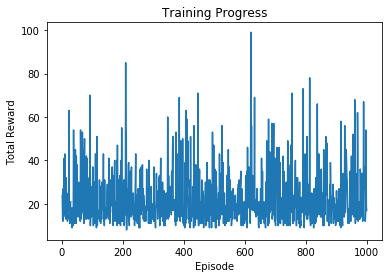

In [12]:
# After running training function and generating scores
env = gym.make('CartPole-v1')
nb_episodes = 1000
scores = train(env, nb_episodes)
env.close()

# Plot Scores
plt.plot(range(1, nb_episodes + 1), scores)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Training Progress')
plt.show()